# Introduction to Sentiment Analysis

So far we've looked at very high-level concepts, we're going to start digging deeper into some of the most common natural language proceessing tasks and tools: Sentiment Analysis. 

### What is Sentiment Analysis?
It's the process of automatically determining the emotional tone of a piece of text. Is the author expressing a positive, negative or neutral opinion? This is incredible useful for businesses who want to understand customer feedback, trackc brand perception, and more.

In this notebook you will learn how to:
- Use a powerful VADER tool from the NLTK library to get sentiment scores
- Apaply VADER to an entire dataframe to analyse thousands of reviews at once
- Compare results 

### Setup: Imports and Data loading
First, we'll set up our environment. We need to import pandas, and we'll also import a special tool for sentiment analysis called SentimentIntensityAnalyzer, from the NLTK library. It's often referred to by its project name VADER.

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (only needs to be done once)
nltk.download('vader_lexicon')

# Load the BBC News dataset from our stable URL
url = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'
bbc_df = pd.read_csv(url)

print("Setup complete. VADER is ready and the BBC dataset is loaded.")
bbc_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Setup complete. VADER is ready and the BBC dataset is loaded.


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### What is VADER?
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained sentiment analysis tool that is excellent for text from social media and reviews. It uses a dictionary of words and grammatical rules to figure out the sentiment score. 

The best part for us is that we don't have to spend any time training it. We can use it straight away. 

Let's initialise it and test it on a few sentences

In [3]:
# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Let's test it on a few example sentences
print(sid.polarity_scores('This was the best meal I have ever had!'))
print(sid.polarity_scores('The service was slow and the food was terrible.'))
print(sid.polarity_scores('The movie was okay, but not great.'))

{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.6696}
{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.408, 'neu': 0.459, 'pos': 0.133, 'compound': -0.6112}


### Analysing the entire Dataset
Now for the powerful part. We can apply VADER to every single article in our 'text' column to get a sentiment score for each one. We'll use .apply() and a lambda function to extract just the compound score. 

In [4]:
# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Create a new column 'sentiment_score' by applying VADER to the 'text' column
# We use a lambda function to get just the 'compound' score from the output dictionary
bbc_df['sentiment_score'] = bbc_df['text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Let's look at our DataFrame with the new sentiment score
bbc_df[['text', 'sentiment_score']].head()

,text,sentiment_score
0,tv future in the hands of viewers with home th...,0.9934
1,worldcom boss left books alone former worldc...,-0.9728
2,tigers wary of farrell gamble leicester say ...,0.9403
3,yeading face newcastle in fa cup premiership s...,0.9607
4,ocean s twelve raids box office ocean s twelve...,0.9218


### Analysing the Results 
Now that we have a sentiment score for each article, let's analyse the distribution of these scores. 

#### Descriptive Statistics
Let's start by getting some simple statistics on our new column

In [5]:
# Use the .describe() method to see the summary statistics of the sentiment scores
bbc_df['sentiment_score'].describe()

count    2225.000000
mean        0.401882
std         0.797951
min        -0.999900
25%        -0.458800
50%         0.925300
75%         0.984700
max         1.000000
Name: sentiment_score, dtype: float64

Notice that the mean score is very close to 0. The standard deviation is also quite small, suggesting most scores are clustered together

#### Visualising the distribution
A histogram is the best way to see the distribution of scores. We can use the .plot() methods that comes with Pandas

<Axes: title={'center': 'Distribution of Sentiment Scores for BBC News Articles'}, ylabel='Frequency'>

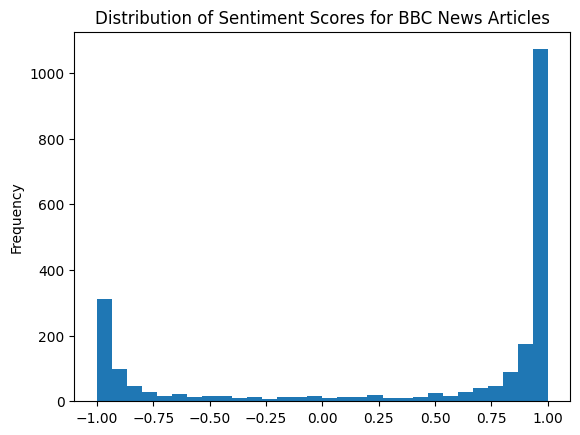

In [6]:
# Plot a histogram of the sentiment scores
# A 'kind' of 'hist' creates a histogram. 'bins=30' gives us enough bars to see the detail.
bbc_df['sentiment_score'].plot(
    kind='hist',
    bins=30,
    title='Distribution of Sentiment Scores for BBC News Articles'
)

### Looking at the 'most' positive and negative articles 
We can look at the most positive and most negative articles found in VADER

In [7]:
# Display the 5 most positive articles
print("--- 5 ARTICLES WITH HIGHEST POSITIVE SCORE ---")
display(bbc_df.sort_values(by='sentiment_score', ascending=False).head())

# Display the 5 most negative articles
print("\n--- 5 ARTICLES WITH HIGHEST NEGATIVE SCORE ---")
display(bbc_df.sort_values(by='sentiment_score', ascending=True).head())

--- 5 ARTICLES WITH HIGHEST POSITIVE SCORE ---


,category,text,sentiment_score
1615,entertainment,scissor sisters triumph at brits us band sciss...,1.0000
1604,politics,kilroy launches veritas party ex-bbc chat sh...,0.9999
1874,entertainment,aviator and vera take bafta glory hollywood bl...,0.9999
1263,entertainment,the producers scoops stage awards the producer...,0.9999
865,entertainment,brits debate over urban music joss stone a ...,0.9998



--- 5 ARTICLES WITH HIGHEST NEGATIVE SCORE ---


,category,text,sentiment_score
408,politics,terror powers expose tyranny the lord chance...,-0.9999
1848,politics,mps murder sentence concern murder sentences ...,-0.9997
1189,tech,call for action on internet scam phone compani...,-0.9991
140,business,disaster claims less than $10bn insurers hav...,-0.9987
1115,politics,blunkett sorry over murder plan david blunkett...,-0.9986


When you read the text of these articles you'll ntice that they aren't really opinions. The positive articles are likley to use words like 'best', 'support' and 'win', while negative ones use words like 'confluct', 'loss', 'crisis' and 'attack'. VADER is correctly identifying the emotional tone of the words, but the articles themselves are still factual reports

## Exercise
Let's categorise each article and count them up 
1. Create the label_sentiment function from the previous notebook that takes a score and returns 'Positive', 'Negative', or 'Neutral' (using the +/- 0.05 threshold)
2. Apply this function to the 'sentiment_score' column to create a new 'sentiment_label' column
3. Use .value_counts() on the new 'sentiment_label' column. What percentage of articles fall into each category ? 

In [ ]:
# Your code for the Exercise here

## Conclusion
You now know how to apply sentiment analysis to a dataframe and, more importantly, you've seen a critical lesson in action: the result of your analysis will depend entirely on the nature of your data.

For a project where you genuinely want to measure public opinion, you would return to a dataset of reviews, comments or social media posts. For this news dataset, a more appropriate next step would be something like __Topic Modelling__, to find out what the majoir themse of the articles are.